# **Assunto: Programação Orientada a Objetos**

**professor: Sérgio Assunção Monteiro, DSc**

# **Contexto** 

Sérgio Monteiro começou a praticar corrida recentemente. Ele entende a importância desse exercício e, realmente, quer levar a sério. Para ajudá-lo nessa missão, ele implementou um programa em Python orientado a objetos que armazena os dados das corridas por mês e os apresenta em um gráfico, para que ele possa visualizar o desempenho dele. Mas ele resolveu ir um pouco mais além e estudar a tendência do desempenho dele. Abaixo, está o resultado do programa que ele implementou.


**Classe Pessoa**

In [5]:
class Pessoa:  
    def __init__(self, nome, ender):
        self.set_nome(nome)
        self.set_ender(ender)

    def set_nome(self, nome):
      self.nome=nome

    def set_ender(self, ender):
      self.ender=ender

    def get_nome(self):
      return self.nome
    
    def get_ender(self):
      return self.ender

**Objeto pessoa**

In [6]:
pessoa1 = Pessoa("maria","rua 01234")
pessoa2 = Pessoa("joão","rua 56789")

**Imprimir cada um dos objetos**

In [12]:
print(f'Nome: {pessoa1.get_nome()}, Endereço: {pessoa1.get_ender()}')

Nome: maria, Endereço: rua 01234


In [13]:
print(f'Nome: {pessoa2.get_nome()}, Endereço: {pessoa2.get_ender()}')

Nome: joão, Endereço: rua 56789


**Criar uma função para imprimir dados**

In [14]:
def imprimir_dados(pessoa):
  print(f'Nome: {pessoa.get_nome()}, Endereço: {pessoa.get_ender()}')

In [15]:
imprimir_dados(pessoa1)

Nome: maria, Endereço: rua 01234


In [16]:
imprimir_dados(pessoa2)

Nome: joão, Endereço: rua 56789


**Criar uma função Lambda para imprimir dados**

In [17]:
imprimir= lambda pessoa: print(f'Nome: {pessoa.get_nome()}, Endereço: {pessoa.get_ender()}')

In [18]:
imprimir(pessoa1)

Nome: maria, Endereço: rua 01234


In [19]:
imprimir(pessoa2)

Nome: joão, Endereço: rua 56789


**Mudar a Classe Pessoa**

In [21]:
class PessoaModificada:  
    def __init__(self, nome, ender):
        self.set_nome(nome)
        self.set_ender(ender)

    def set_nome(self, nome):
      self.nome=nome

    def set_ender(self, ender):
      self.ender=ender

    def get_nome(self):
      return self.nome
    
    def get_ender(self):
      return self.ender
    def imprimir_dados(self):
      print(f'Nome: {self.get_nome()}, Endereço: {self.get_ender()}')      

**Objetos**

In [22]:
pessoa1M = PessoaModificada("maria","rua 01234")
pessoa2M = PessoaModificada("joão","rua 56789")

**Imprimir Dados**

In [23]:
pessoa1M.imprimir_dados()

Nome: maria, Endereço: rua 01234


In [24]:
pessoa2M.imprimir_dados()

Nome: joão, Endereço: rua 56789


**Classe de Gráficos**

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

class Grafico:  
  def __init__(self, lista_corridas):
    self.lista_corridas=lista_corridas
    self.imprimir_graficos()

  def padrao_do_grafico(self):
    plt.xlabel('Dia')
    plt.ylabel('Corrida em metros(m)')
    plt.title('Gráficos de Corridas')    

  def imprimir_graficos(self):
    self.padrao_do_grafico()
    for corrida in self.lista_corridas:
      mLista = corrida.dicionario.items()
      cor = corrida.cor
      nome = corrida.nome
      x, y = zip(*mLista)
      plt.plot(x, y, label = nome, marker='o', 
               markerfacecolor='blue', 
               markersize=12, 
               color=cor, 
               linewidth=4)
    plt.legend()
    plt.show()

  def regressao_linear(self, id_grafico):
    corrida = self.lista_corridas[id_grafico]
    mLista = corrida.dicionario.items()    
    cor = corrida.cor
    nome = corrida.nome
    dias, valores = zip(*mLista)
    dias = np.array(dias)
    valores = np.array(valores)
    dias = dias.reshape(-1, 1)
    valores = valores.reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(X=dias, y=valores)
    plt.plot(dias, regr.predict(dias), 
             color='blue',
             label = "Regressão Linear")

    x, y = zip(*mLista)
    plt.plot(x, y, label = nome+str(" - original"), 
             marker='o', 
             markerfacecolor='olive', 
             markersize=12, 
             color=cor, 
             linewidth=4)

    plt.legend()
    plt.show()


**Classe de Corridas**

In [26]:
class Corrida:
    def __init__(self, dicionario, cor, nome):
        self.dicionario = dicionario
        self.cor=cor
        self.nome = nome

**Chamadas**

In [32]:
maio = Corrida({1:1000,5:1000,7:1500,17:1500,20:1700,29:2000},'skyblue','maio')
junho = Corrida({1:1000,3:1000,5:1500,7:1500,15:1500,20:1700,27:2000},'red','junho')
julho = Corrida({1:1000,3:1000,5:1500,7:1500,10:2000,15:2000,20:2700,27:2500},'olive','julho')
lista_corridas = [maio,junho,julho]

**Gráfico de Desempenho**

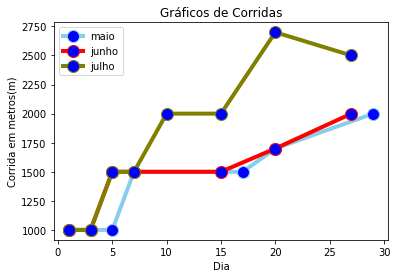

In [33]:
grafico = Grafico(lista_corridas)

**Regressão Linear (Estudo de Tendência)**

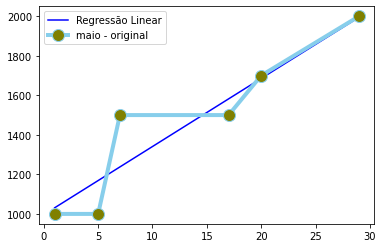

In [34]:
id_mes = 0 #mês de maio
grafico.regressao_linear(id_mes)